<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Cargar el dataset
df = sns.load_dataset('penguins')

Primero hago un analisis exploratorio del dataset

In [2]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [3]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Se observa que en las columnas se describe una especie en este caso de pingüino, la isla a la que pertenece y su morfologia

_________________________________________________

¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

agrupo los datos

In [4]:
df.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


Y se observa que las especies son: "Adelie", "Chinstrap" y "Gentoo"

Las caracteristicas para cada de una de estas especies son: "Longitud del pico", "Profundidad del pico", "Longitud de la aleta", "Masa corporal" y "Sexo"

_________________________________________________

¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


Se observa que hay valores faltantes para algunas columnas, como según la información del dataset estos valores faltantes me pueden afectar la estadistica que se quiere realizar porque no tendría sentido el poner esos espacios con NaN o ceros porque no hay especies que existan en una isla y que tenga algo así como 0 longitud de pico, entonces lo que considero mejor en este caso ya que se tiene una buena cantidad de datos es eliminar las filas completas con la información donde se encuentren esos espacios vacios

In [8]:
df2 = df.dropna().copy()

In [9]:
df2.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


_________________________________________________

¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

Ahora se quiere saber cual es la isla con mayor número de pinguinos

In [11]:
df2.groupby('island')['species'].count()

,species
island,
Biscoe,163
Dream,123
Torgersen,47


Se observa que la isla con mayor número de pungüinos es "Biscoe" y si hay un gran desbalance

_________________________________________________

Repita la pregunta anterior observando las especies.

Luego se hace la revisión por especie

In [12]:
df2.groupby(['island', 'species'])['species'].count()

island     species  
Biscoe     Adelie        44
           Gentoo       119
Dream      Adelie        55
           Chinstrap     68
Torgersen  Adelie        47
Name: species, dtype: int64

Aqui se observa que las tres islas tienen especie Adelie además de ser una cantidad equilibrada del número de pingüinos de esa especie.

_________________________________________________

¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [13]:
df2.groupby(['species'])['bill_length_mm'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,38.823973,2.662597,32.1,36.725,38.85,40.775,46.0
Chinstrap,68.0,48.833824,3.339256,40.9,46.350,49.55,51.075,58.0
Gentoo,119.0,47.568067,3.106116,40.9,45.350,47.40,49.600,59.6


Se tiene que la longitud media y la desviación estandar para cada especie es:

Adelie (mean: 38.823973; std: 2.662597)

Chinstrap (mean: 48.833824; std: 3.339256)

Gentoo (mean: 47.568067; std: 3.106116)

_________________________________________________

¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [14]:
df2['bill_length_mm'].max()

59.6

In [15]:
df2.loc[df2['bill_length_mm'] == 59.6]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


El pingüino con el pico mas largo es de 59.6 mm y su especie es Gentoo pertenece a la isla Biscoe

_________________________________________________

¿Como es la distribución de la masa corporal entre las especies de pingüinos?

In [16]:
masa_especie = df2[['species','body_mass_g']]

In [17]:
grupo_masa_especie = masa_especie.groupby('species').size()
grupo_masa_especie

,0
species,
Adelie,146
Chinstrap,68
Gentoo,119


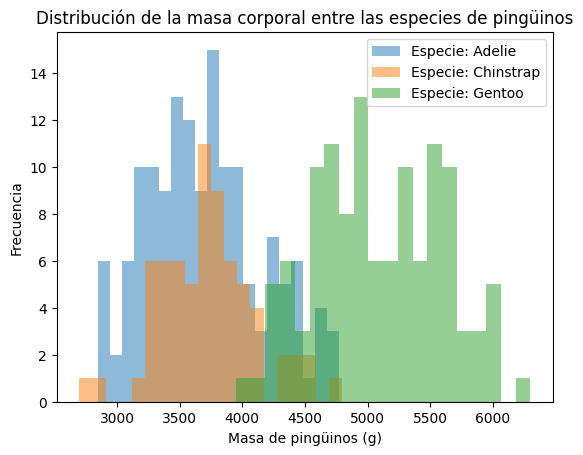

In [18]:
# Graficar histogramas separados por especie
for categoria, grupo in masa_especie.groupby('species'):
    plt.hist(grupo['body_mass_g'], bins=20, alpha=0.5, label=f"Especie: {categoria}")

plt.xlabel("Masa de pingüinos (g)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la masa corporal entre las especies de pingüinos")
plt.legend()
plt.show()

_________________________________________________

Describa la distribucion con ayuda de la media, desviacion estandard

In [19]:
masa_especie.groupby('species').mean()

,body_mass_g
species,
Adelie,3706.164384
Chinstrap,3733.088235
Gentoo,5092.436975


In [20]:
masa_especie.groupby('species').std()

,body_mass_g
species,
Adelie,458.620135
Chinstrap,384.335081
Gentoo,501.476154


_________________________________________________

¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [21]:
prom_sex = df2.groupby(['sex'])['body_mass_g'].mean()
prom_sex

,body_mass_g
sex,
Female,3862.272727
Male,4545.684524


In [22]:
dif_prom = prom_sex['Male'] - prom_sex['Female']
print(f'La diferencia en masa corporal promedio entre machos y hembras es: {dif_prom}')

La diferencia en masa corporal promedio entre machos y hembras es: 683.4117965367964


In [23]:
std_sex = df2.groupby(['sex'])['body_mass_g'].std()
std_sex

,body_mass_g
sex,
Female,666.172050
Male,787.628884


In [24]:
dif_std = std_sex['Male'] - std_sex['Female']
print(f'La diferencia en desviación estandar entre machos y hembras es: {dif_std}')

La diferencia en desviación estandar entre machos y hembras es: 121.45683464202966


Se puede analizar también graficamente

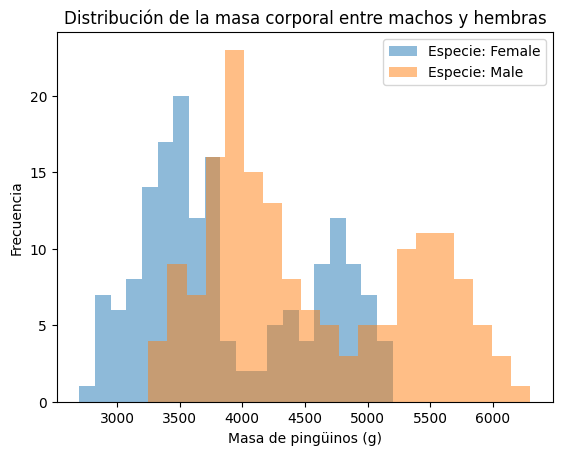

In [25]:
masa_sexo = df2[['sex','body_mass_g']]

for categoria, grupo in masa_sexo.groupby('sex'):
    plt.hist(grupo['body_mass_g'], bins=20, alpha=0.5, label=f"Especie: {categoria}")

plt.xlabel("Masa de pingüinos (g)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la masa corporal entre machos y hembras")
plt.legend()
plt.show()

_________________________________________________

¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?



In [26]:
df2.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [27]:
flipper_describe = df2.groupby(['species'])['flipper_length_mm'].describe()
flipper_describe

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,190.102740,6.521825,172.0,186.0,190.0,195.0,210.0
Chinstrap,68.0,195.823529,7.131894,178.0,191.0,196.0,201.0,212.0
Gentoo,119.0,217.235294,6.585431,203.0,212.0,216.0,221.5,231.0


In [28]:
adelie_mean = flipper_describe.loc['Adelie']['mean']
adelie_std = flipper_describe.loc['Adelie']['std']

chinstrap_mean = flipper_describe.loc['Chinstrap']['mean']
chinstrap_std = flipper_describe.loc['Chinstrap']['std']

gentoo_mean = flipper_describe.loc['Gentoo']['mean']
gentoo_std = flipper_describe.loc['Gentoo']['std']

print(f'Longitud media de la aleta especie Adelie es: {adelie_mean} y su desviación estándar: {adelie_std}')
print(f'Longitud media de la aleta especie Chinstrap es: {chinstrap_mean} y su desviación estándar: {chinstrap_std}')
print(f'Longitud media de la aleta especie Gentoo es: {gentoo_mean} y su desviación estándar: {gentoo_std}')

Longitud media de la aleta especie Adelie es: 190.1027397260274 y su desviación estándar: 6.521824847286748
Longitud media de la aleta especie Chinstrap es: 195.8235294117647 y su desviación estándar: 7.131894258578146
Longitud media de la aleta especie Gentoo es: 217.23529411764707 y su desviación estándar: 6.5854306093881805


_________________________________________________

¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?



In [29]:
df2.groupby(['species'])['flipper_length_mm'].max()

,flipper_length_mm
species,
Adelie,210.0
Chinstrap,212.0
Gentoo,231.0


In [30]:
df2.groupby(['species'])['flipper_length_mm'].min()

,flipper_length_mm
species,
Adelie,172.0
Chinstrap,178.0
Gentoo,203.0


Se observa que la longitud máxima de la aleta la tiene la especie Gentoo y la minima la tiene la especie Adelie

_________________________________________________

¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?



In [31]:
df2.groupby(['island','species'])['bill_length_mm'].max()

island     species  
Biscoe     Adelie       45.6
           Gentoo       59.6
Dream      Adelie       44.1
           Chinstrap    58.0
Torgersen  Adelie       46.0
Name: bill_length_mm, dtype: float64

In [32]:
df2.groupby(['island','species'])['bill_length_mm'].min()

island     species  
Biscoe     Adelie       34.5
           Gentoo       40.9
Dream      Adelie       32.1
           Chinstrap    40.9
Torgersen  Adelie       33.5
Name: bill_length_mm, dtype: float64

_________________________________________________

¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?



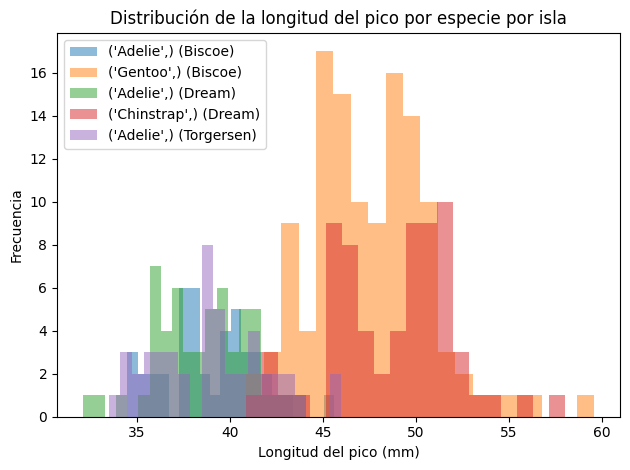

In [33]:
df_biscoe = df2[df2['island'] == 'Biscoe']
df_pico_biscoe = df_biscoe[['species','bill_length_mm']]

df_dream = df2[df2['island'] == 'Dream']
df_pico_dream = df_dream[['species','bill_length_mm']]

df_torgersen = df2[df2['island'] == 'Torgersen']
df_pico_torgersen = df_torgersen[['species','bill_length_mm']]

for categoria, grupo in df_pico_biscoe.groupby(['species']):
    plt.hist(grupo['bill_length_mm'], bins=20, alpha=0.5, label=f"{categoria} (Biscoe)")

for categoria, grupo in df_pico_dream.groupby(['species']):
    plt.hist(grupo['bill_length_mm'], bins=20, alpha=0.5, label=f"{categoria} (Dream)")

for categoria, grupo in df_pico_torgersen.groupby(['species']):
    plt.hist(grupo['bill_length_mm'], bins=20, alpha=0.5, label=f"{categoria} (Torgersen)")

plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la longitud del pico por especie por isla")
plt.tight_layout()
plt.legend()
plt.show()

_________________________________________________


¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.



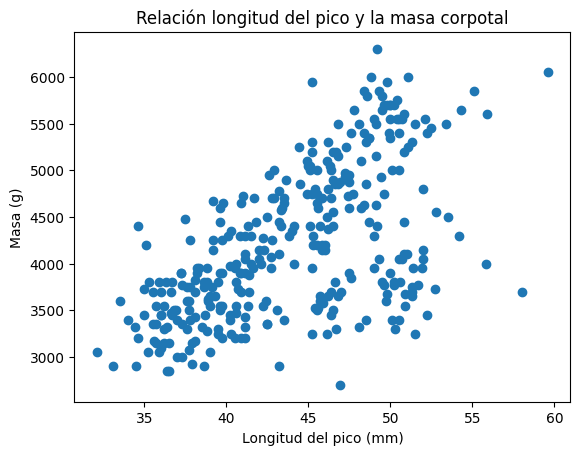

In [34]:
# Grafico de dispersion de la relacion entre la longitud del pico y la masa corporal

df_long_pico_masa = df2[['bill_length_mm','body_mass_g']]

plt.figure()
plt.scatter(df_long_pico_masa['bill_length_mm'], df_long_pico_masa['body_mass_g'])
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa (g)')
plt.title('Relación longitud del pico y la masa corpotal')
plt.show()

mirando esta reación por especie

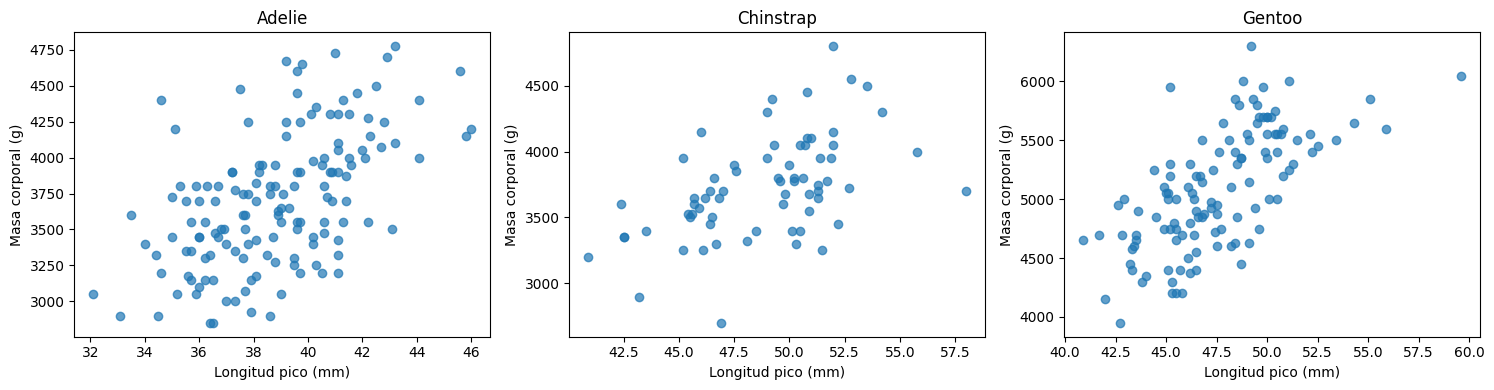

In [35]:
df_especie_long_pico_masa = df2[['species','bill_length_mm','body_mass_g']]

especies = df_especie_long_pico_masa['species'].unique()

fig,ax = plt.subplots(1,3, figsize=(15,4))

for i, especie in enumerate(especies):
    datos = df_especie_long_pico_masa[df_especie_long_pico_masa['species'] == especie]

    ax[i].scatter(datos['bill_length_mm'], datos['body_mass_g'], alpha=0.7)
    ax[i].set_title(f"{especie}")
    ax[i].set_xlabel("Longitud pico (mm)")
    ax[i].set_ylabel("Masa corporal (g)")

plt.tight_layout()
plt.show()

_________________________________________________

¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?



Para observar esta correlación se hace uso de un script dado por la IA

In [36]:
from scipy.stats import pearsonr

for especie in df2['species'].unique():
    datos = df2[df2['species'] == especie][['bill_length_mm', 'body_mass_g']].dropna()

    r, p = pearsonr(datos['bill_length_mm'], datos['body_mass_g'])

    print(f"{especie}: r = {r:.3f}, p-value = {p}")

Adelie: r = 0.544, p-value = 1.2419179713063618e-12
Chinstrap: r = 0.514, p-value = 7.480491991584475e-06
Gentoo: r = 0.667, p-value = 1.2624180880764266e-16


Se tiene que:

$r \approx 1 \rightarrow$ Correlación positiva fuerte (más largo el pico, mayor la masa)

$r \approx -1 \rightarrow$ Correlación negativa fuerte

$r = 0 \rightarrow$ no hay correlación lineal

$p < 0.05 \rightarrow$ La correlación es estadísticamente significativa (nivel de confianza del 95\%)

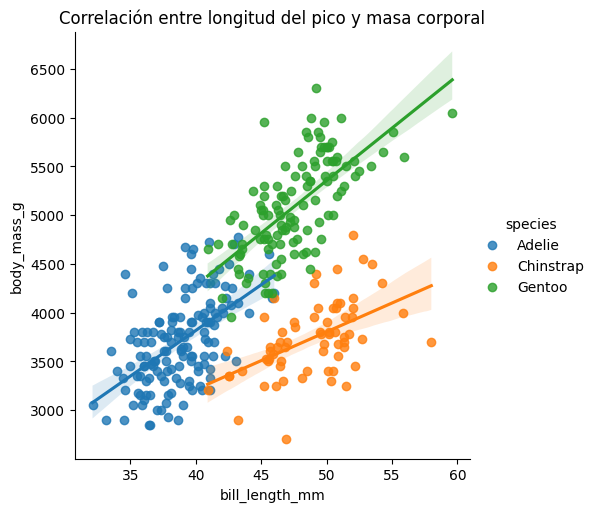

In [37]:
sns.lmplot(data=df2, x='bill_length_mm', y='body_mass_g', hue='species')
plt.title("Correlación entre longitud del pico y masa corporal")
plt.show()

_________________________________________________

¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



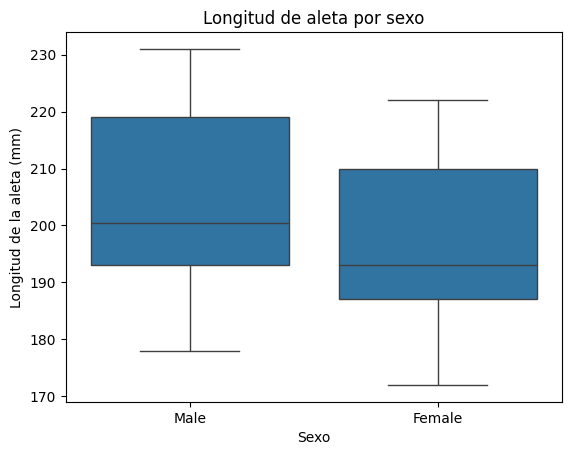

In [38]:
# Grafico de dispersion de la relacion entre el sexo y la longitud de la aleta

sns.boxplot(data=df2, x='sex', y='flipper_length_mm')
plt.title("Longitud de aleta por sexo")
plt.xlabel("Sexo")
plt.ylabel("Longitud de la aleta (mm)")
plt.show()

Se observa un mayor tamaño de la aleta para los pingüinos machos

_________________________________________________

Test de hipótesis

Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.